##Tugas Praktisi
###Analisis World Happiness
Kuncoro Adi Wibowo // 4112321028

In [31]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [32]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

In [33]:
df = pd.read_csv('rankings.csv')

In [34]:
df.head(3)

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191


In [35]:
df.tail(2)

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034
145,146,Afghanistan,2.404,2.469,2.339,1.263,0.758,0.000,0.289,0.000,0.089,0.005


In [36]:
df.shape

(146, 12)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        146 non-null    int64  
 1   Country                                     146 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: 

In [38]:
df.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [39]:
column = {'RANK' : 'Rank', 'Happiness score' : 'Happiness_score', 'Whisker-high' : 'Whisker_high', 'Whisker-low' : 'Whisker_low', 'Explained by: GDP per capita' : 'GDP_per_capita',
       'Explained by: Social support' : 'Social_support',
        'Explained by: Healthy life expectancy' : 'Healthy_life_expectancy',
       'Explained by: Freedom to make life choices' : 'Freedom',
       'Explained by: Generosity': 'Generosity',
       'Explained by: Perceptions of corruption' : 'Perceptions of corruption'}

In [40]:
df = df.rename(columns = column)

### Nilai *Happiness score* terhadap *Perceptions of corruption* memiliki beberapa masalah.
### Anggap bahwa nilai ',' adalah '.', oleh karena itu ganti ',' menjadi '.'.

In [41]:
df.head(2)

,Rank,Country,Happiness_score,Whisker_high,Whisker_low,Dystopia (1.83) + residual,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom,Generosity,Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532


### Cek kolom yang berisi nilai null lalu hapus.

In [42]:
df.isna().sum()

Rank                          0
Country                       0
Happiness_score               0
Whisker_high                  0
Whisker_low                   0
Dystopia (1.83) + residual    0
GDP_per_capita                0
Social_support                0
Healthy_life_expectancy       0
Freedom                       0
Generosity                    0
Perceptions of corruption     0
dtype: int64

In [43]:
df.dropna(inplace=True)

In [44]:
df.isna().sum()

Rank                          0
Country                       0
Happiness_score               0
Whisker_high                  0
Whisker_low                   0
Dystopia (1.83) + residual    0
GDP_per_capita                0
Social_support                0
Healthy_life_expectancy       0
Freedom                       0
Generosity                    0
Perceptions of corruption     0
dtype: int64

### Cek nilai duplikat pada kolom dan tidak ditemukan nilai duplikat

In [45]:
df.duplicated().sum()

0

In [46]:
df.describe()

,Rank,Happiness_score,Whisker_high,Whisker_low,Dystopia (1.83) + residual,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom,Generosity,Perceptions of corruption
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,73.500000,5.553575,5.673589,5.433568,1.831808,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781
std,42.290661,1.086843,1.065621,1.109380,0.534994,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514
min,1.000000,2.404000,2.469000,2.339000,0.187000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.250000,4.888750,5.006250,4.754750,1.555250,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250
50%,73.500000,5.568500,5.680000,5.453000,1.894500,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500
75%,109.750000,6.305000,6.448750,6.190000,2.153000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500
max,146.000000,7.821000,7.886000,7.756000,2.844000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000


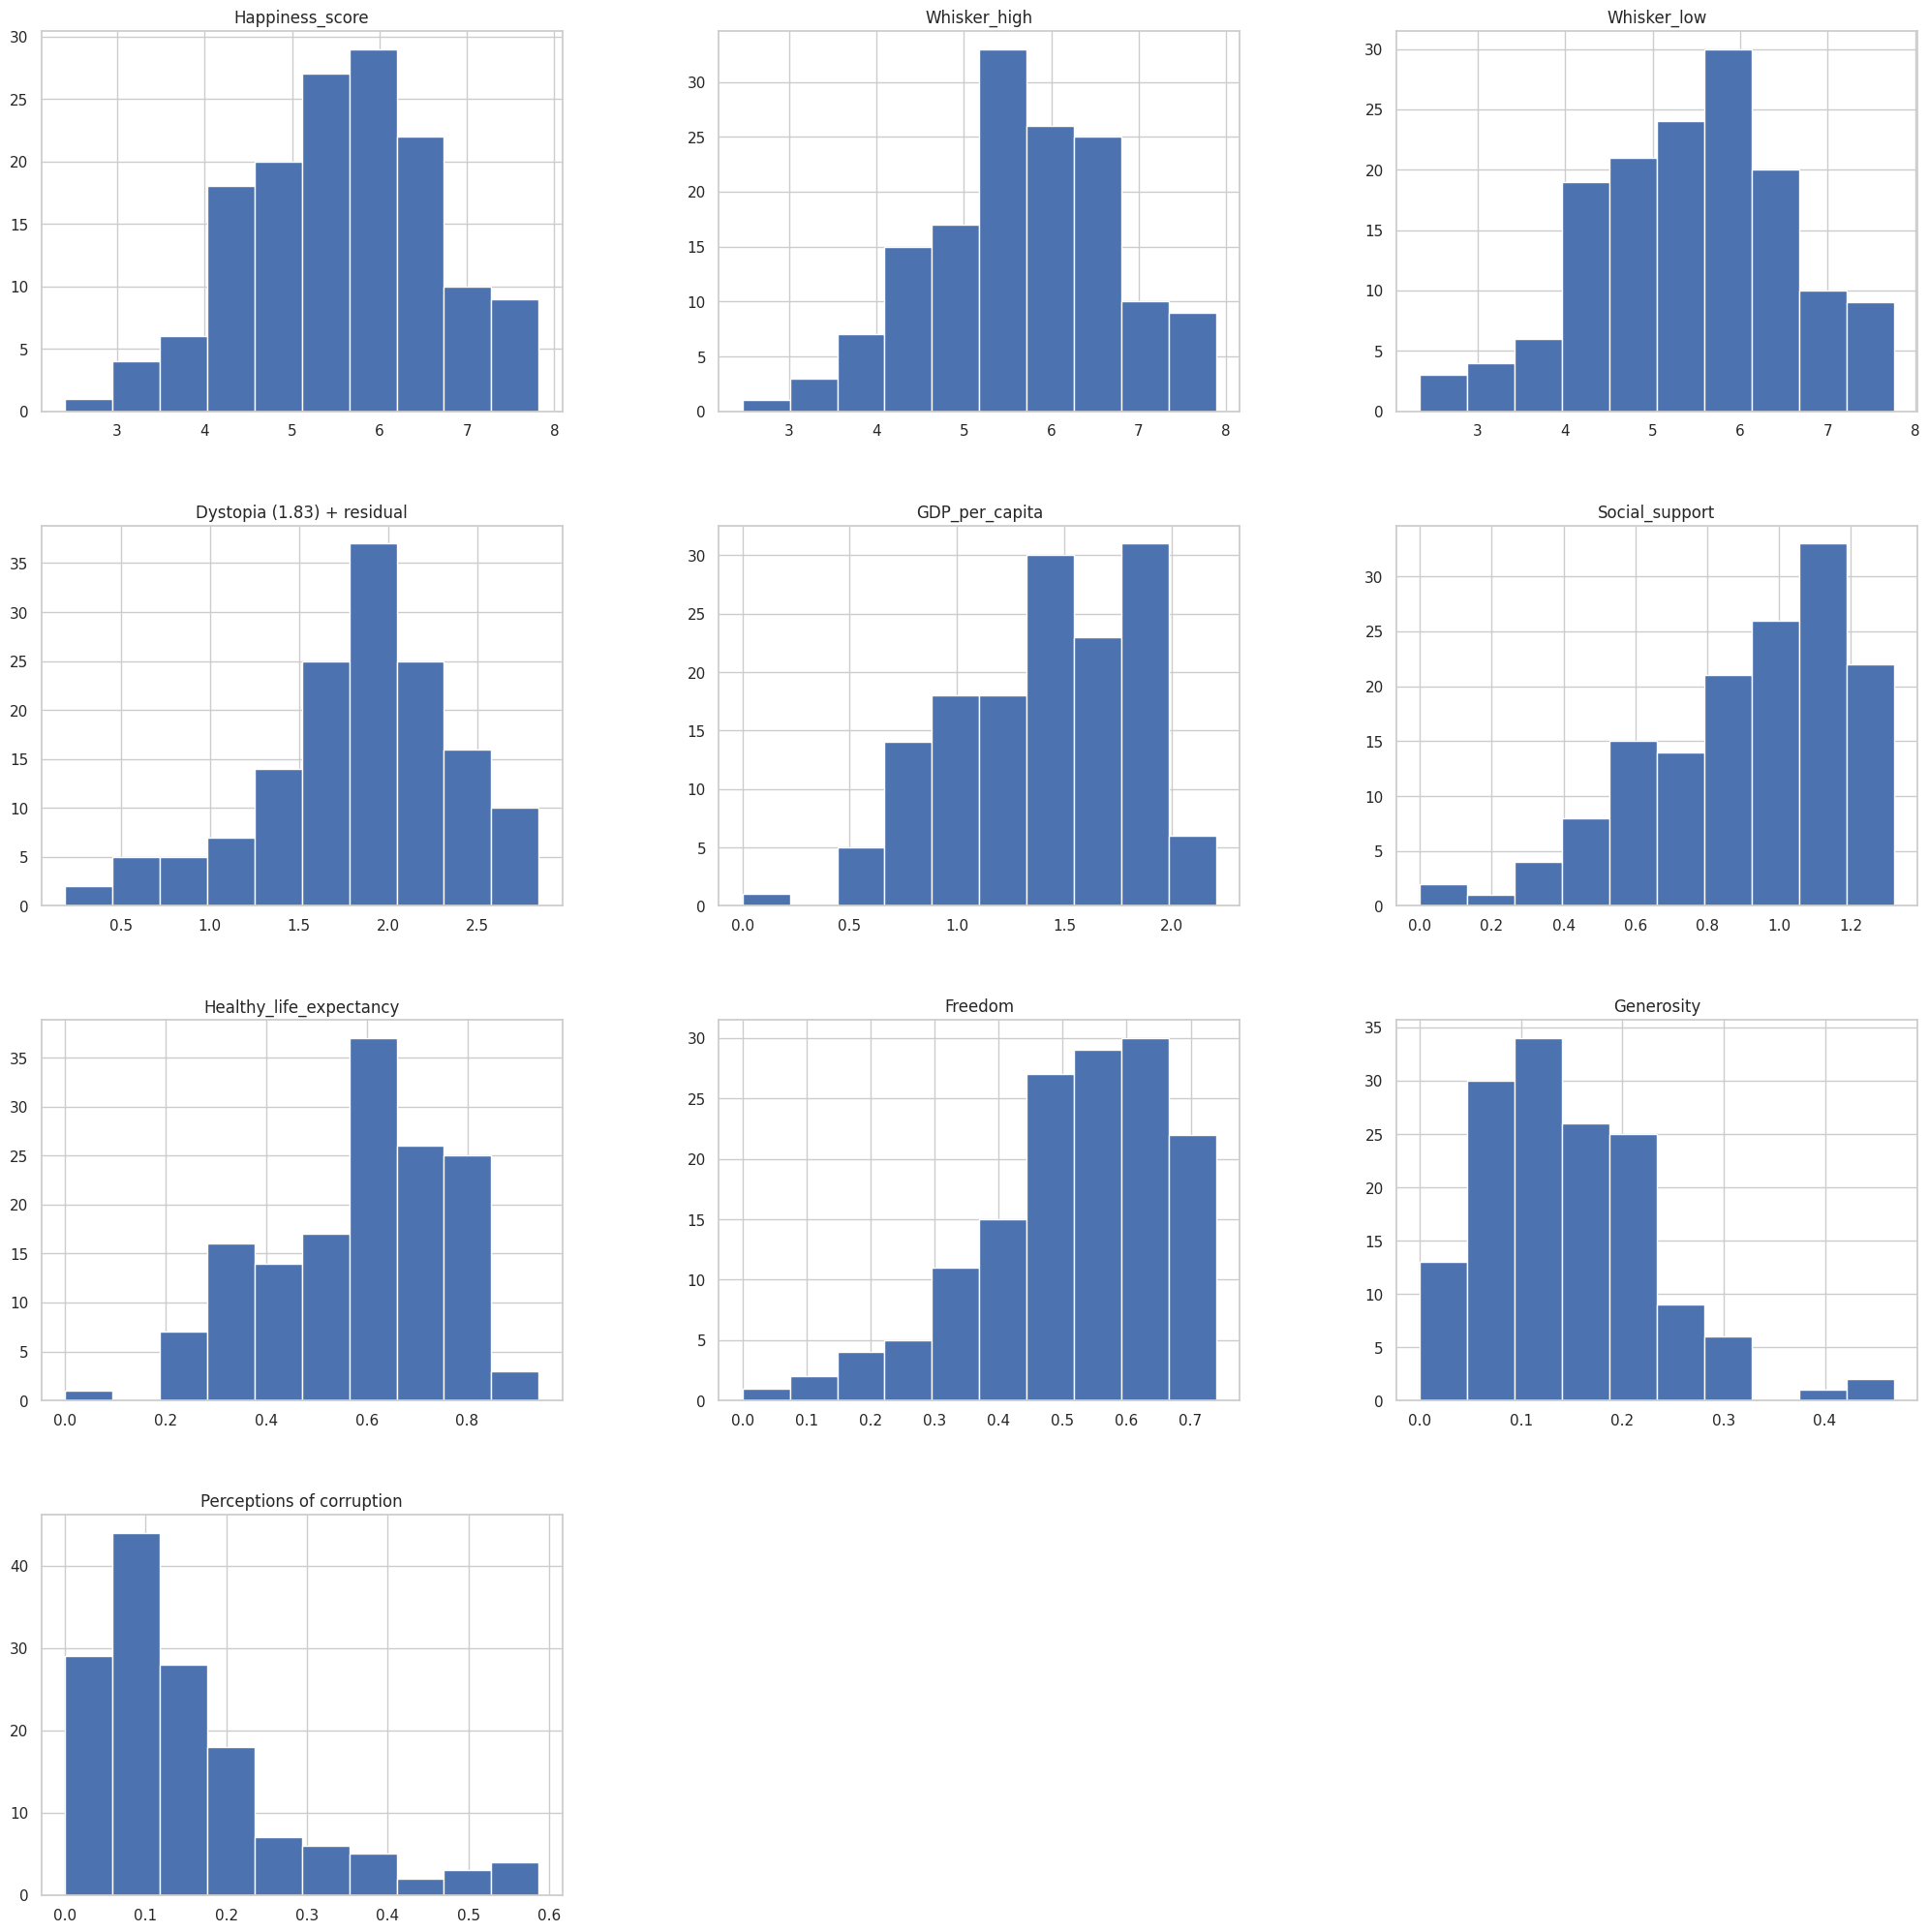

In [47]:
df.drop('Rank', axis = 1).hist(figsize = (25,25))
plt.show()

Kolom-kolom tersebut hampir berdistribusi normal, namun beberapa kolom menunjukkan miring ke kiri atau kanan.

### Gunakan IQR untuk menemukan outlier

In [48]:
df_n = df.iloc[:, 2:]

def detect_outliers_iqr(column, threshold=1.5):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

outliers = df_n.apply(detect_outliers_iqr)

print(outliers.sum())

Happiness_score                1
Whisker_high                   1
Whisker_low                    1
Dystopia (1.83) + residual     6
GDP_per_capita                 1
Social_support                 3
Healthy_life_expectancy        1
Freedom                        3
Generosity                     3
Perceptions of corruption     10
dtype: int64


### Tunjukkan korelasi antara *Happiness score* dengan kolom lainnya

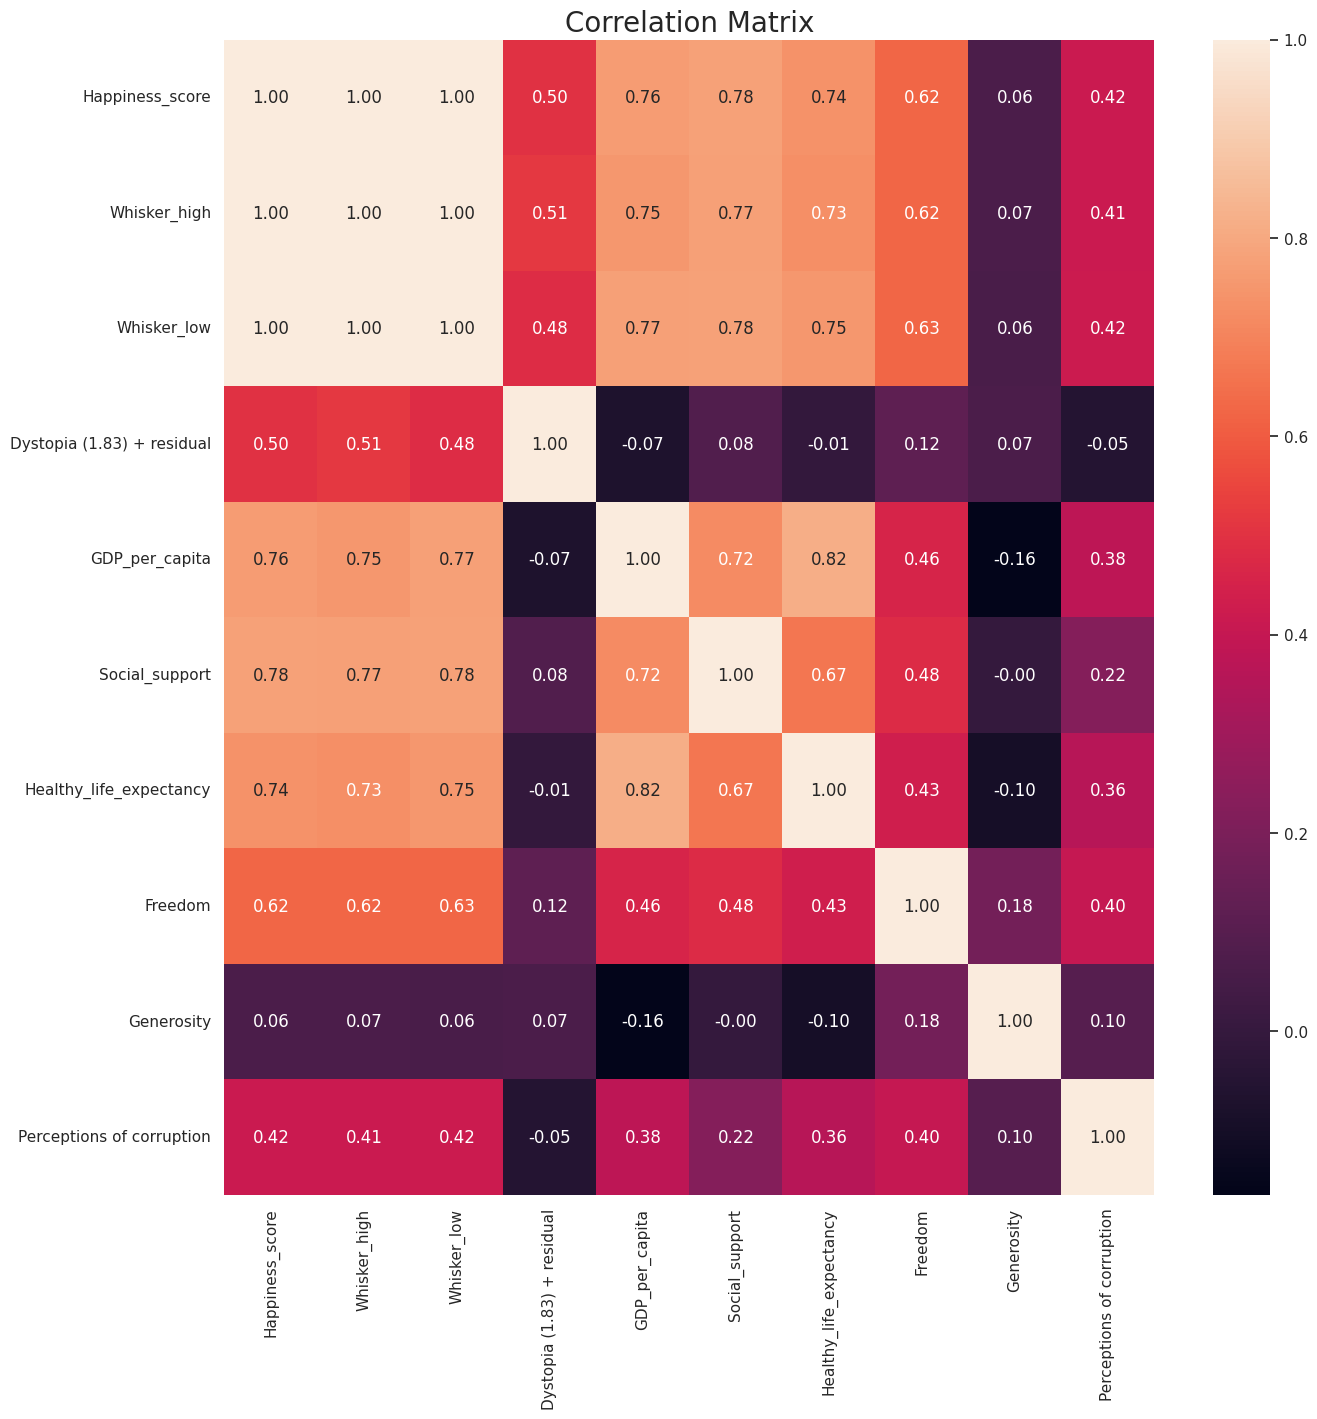

In [49]:
corr_matrix = df.drop(['Rank', 'Country'], axis = 1).corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix, annot = True, fmt = '0.2f')
plt.title("Correlation Matrix", fontsize = 20)
plt.show()

*Happiness score* memiliki korelasi positif dengan kolom lain. *GDP per Capita*, *Social Support* dan *Healthy life Expectancy* menunjukkan korelasi yang tinggi dengan *Happiness score*. *Generosity* memiliki korelasi lebih rendah terhadap *Happiness score*.

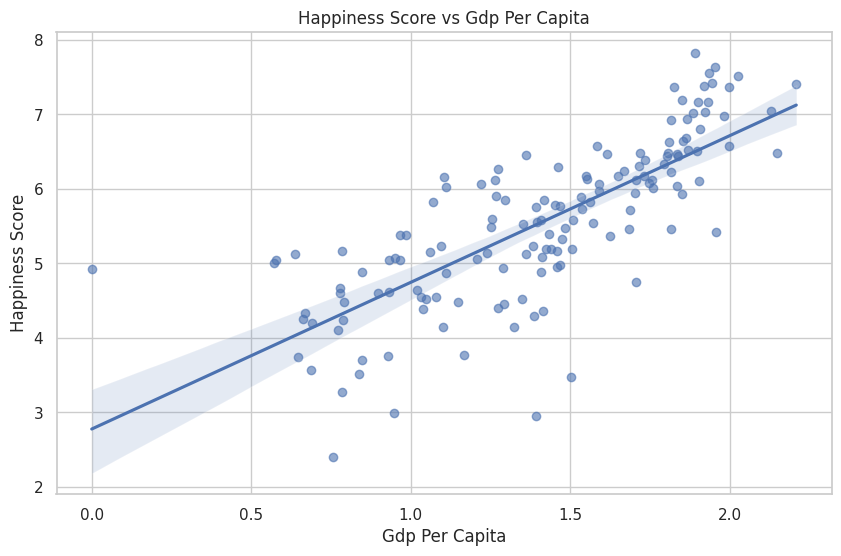

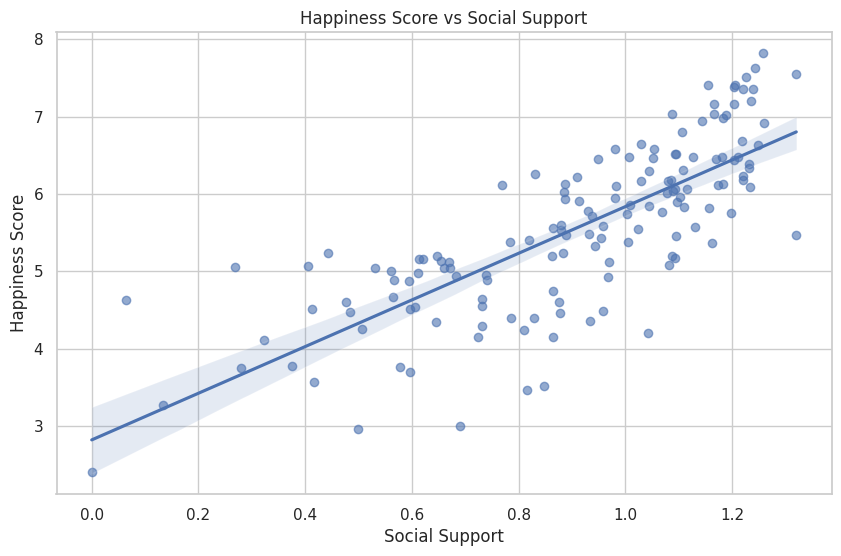

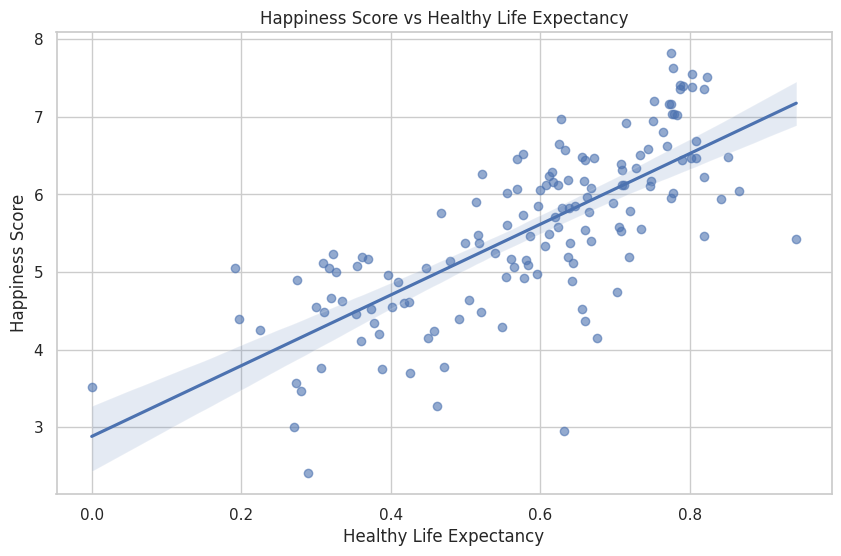

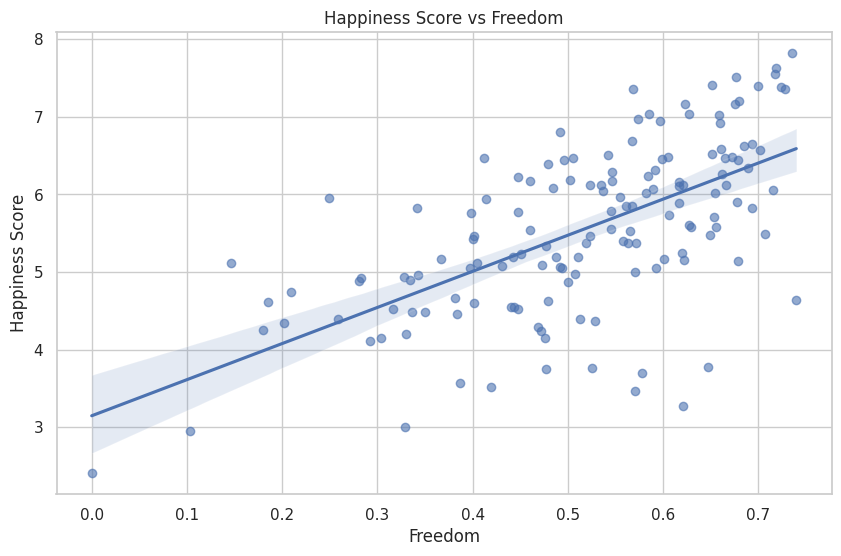

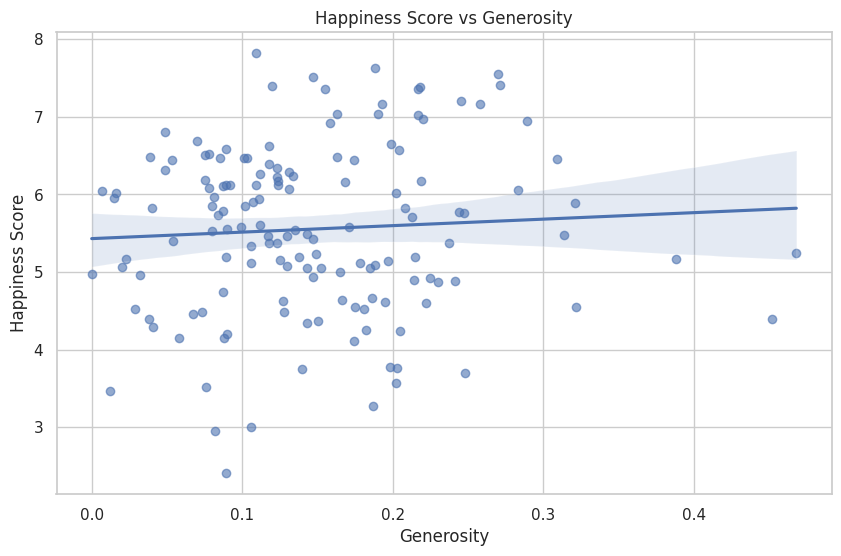

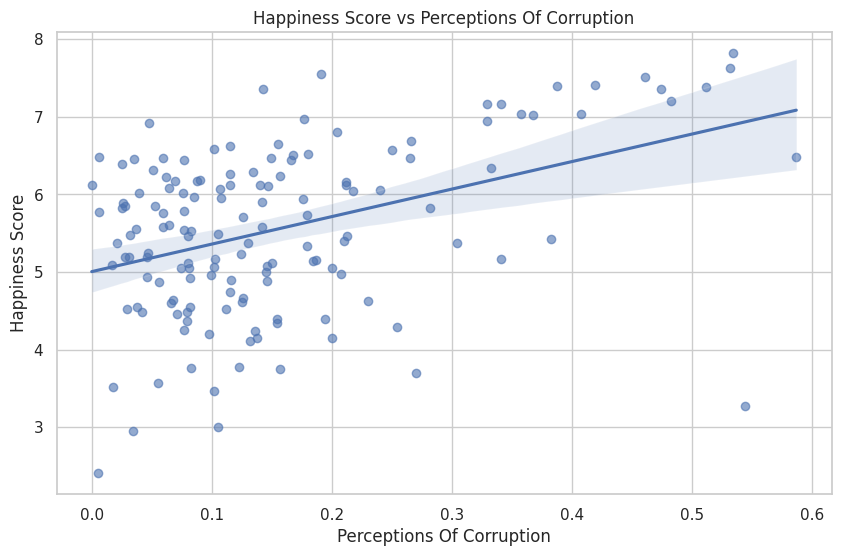

In [50]:
variables = ["GDP_per_capita", "Social_support", "Healthy_life_expectancy", "Freedom", "Generosity", "Perceptions of corruption"]

# Loop through each variable and create scatter plots
for variable in variables:
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df, x=variable, y="Happiness_score", scatter_kws={'alpha':0.6})
    plt.title(f"Happiness Score vs {variable.replace('_', ' ').title()}")
    plt.xlabel(variable.replace('_', ' ').title())
    plt.ylabel("Happiness Score")
    plt.show()

### Insight yang dapat diambil dari plot-plot di atas adalah semakin titik-titik variabel lain yang memengaruhi *Happiness score* mendekati garis, maka semakin tinggi korelasi antar variabel tersebut. Contohnya seperti pada plot *Happines score* vs *GDP per Capita, Healthy Life Expetancy, dan Social Support*.

## 10 negara teratas yang memiliki *Happiness score* tertinggi.

In [51]:
top_10 = df.sort_values(by='Happiness_score', ascending=False).head(10)

In [52]:
top_10

,Rank,Country,Happiness_score,Whisker_high,Whisker_low,Dystopia (1.83) + residual,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom,Generosity,Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
5,6,Luxembourg,7.404,7.501,7.307,2.042,2.209,1.155,0.790,0.700,0.120,0.388
6,7,Sweden,7.384,7.454,7.315,2.003,1.920,1.204,0.803,0.724,0.218,0.512
7,8,Norway,7.365,7.440,7.290,1.925,1.997,1.239,0.786,0.728,0.217,0.474
8,9,Israel,7.364,7.426,7.301,2.634,1.826,1.221,0.818,0.568,0.155,0.143
9,10,New Zealand,7.200,7.279,7.120,1.954,1.852,1.235,0.752,0.680,0.245,0.483


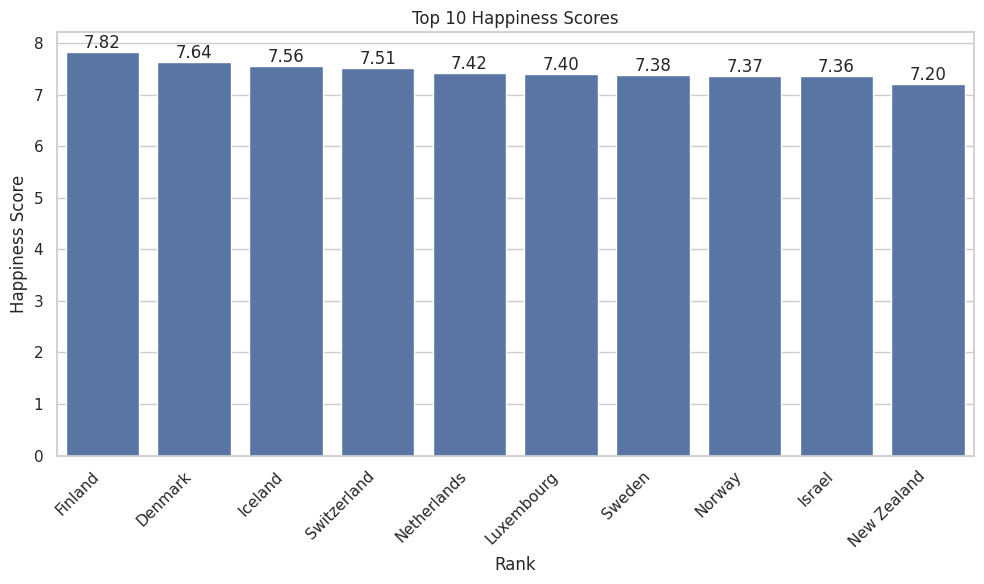

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Happiness_score', data=top_10)
plt.xlabel('Rank')
plt.ylabel('Happiness Score')
plt.title('Top 10 Happiness Scores')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1. Diagram batang menunjukkan Finlandia, Denmark, Islandia, Swiss, Belanda, Luksemburg, Swedia, Norwegia, Israel, dan Selandia Baru adalah 10 negara dengan *Happiness score* teratas.
2. *Happiness score* tertinggi adalah Finlandia dengan nilai 7,82 dan yang terendah adalah Selandia Baru dengan nilai 7,2.